# Práctica de Probabilidad y Estadística I

## Ciencia de Datos e Inteligencia Artificial

Joaquin Negrete, Oliver Anderson, Makar Isaev, y Wenjie Shan


In [4]:
# Load data
load("./pelis1999.1.RData")
data <- pelis1999.1
head(data)


,title,length,budget,rating
,<chr>,<int>,<int>,<dbl>
1,10 Things I Hate About You,97,16000000,6.7
2,"13th Warrior, The",102,85000000,6.1
3,200 Cigarettes,101,6000000,5.4
4,"24 Hour Woman, The",93,2500000,5.6
5,8MM,123,40000000,5.9
6,ABCD,105,200000,5.4


## Análisis Descriptivo Multivariante

### 1.a)


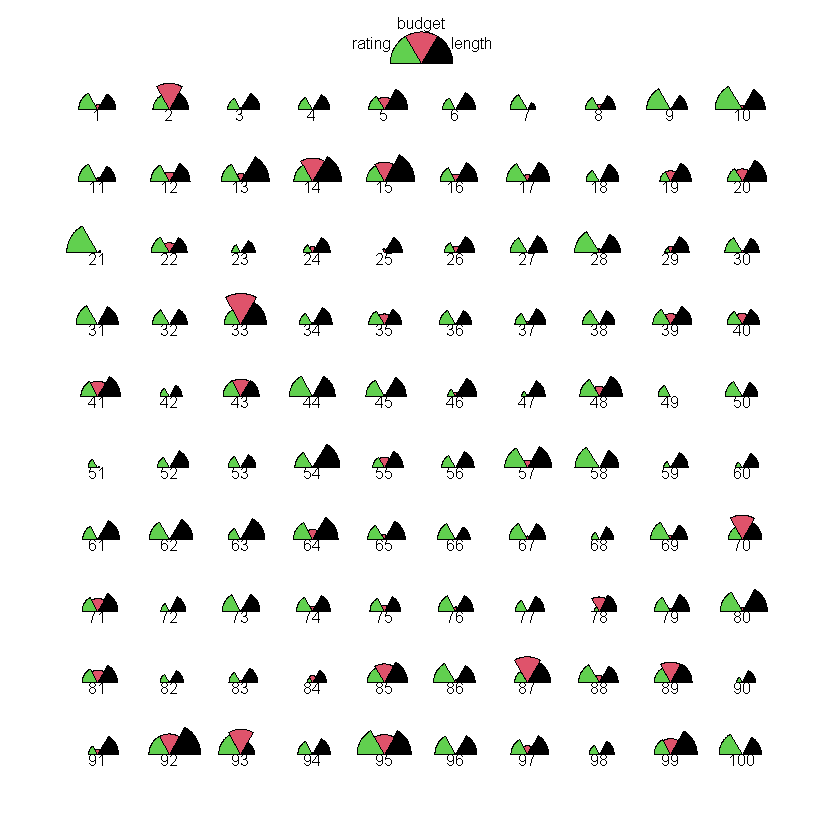

In [5]:
stars(
  data[, c(2:4)],
  key.loc = c(12.7, 24.5),
  draw.segments = TRUE,
  full = FALSE,
)


Lo primero a ver es que el length y rating no parecen tener una relación, ya que existen películas con un rating muy alto y length muy bajo, como la 21, Atrapados; y hay otras como la como la 91, Eye of the Beholder, que pasa al revés. En el resto de películas el rating y length no parecen tener una relación clara.
También se puede ver que el budget en casi todas las películas es muy bajo, y que el rating es muy variable, lo que indica que el rating no depende del presupuesto de la película.

Es curioso ver películas con un rating muy alto y un presupuesto muy bajo, como, nuevamente, Atrapados.
Otras películas como la 51, Chage of Climate, A, tienen todos los valores muy bajos.

Finalmente, películas como las 44, 45, 57 y 58 tienen un nivel parecido de rating, length y budget, lo que indica que podrían ser del mismo género o tener algo en común.


In [6]:
data[c(21, 91, 51, 44, 45, 57, 58), ]


,title,length,budget,rating
,<chr>,<int>,<int>,<dbl>
21,Atrapados,26,3500,9.4
91,Eye of the Beholder,109,15000000,4.5
51,"Change of Climate, A",19,15000,4.6
44,Boys Don't Cry,118,2000000,7.6
45,Bravo Two Zero,115,6500000,6.5
57,"Cider House Rules, The",126,24000000,7.5
58,"Clown in Babylon, A",105,150000,7.8


### 1.b)


Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"
Warning message in par(usr):
"argument 1 does not name a graphical parameter"


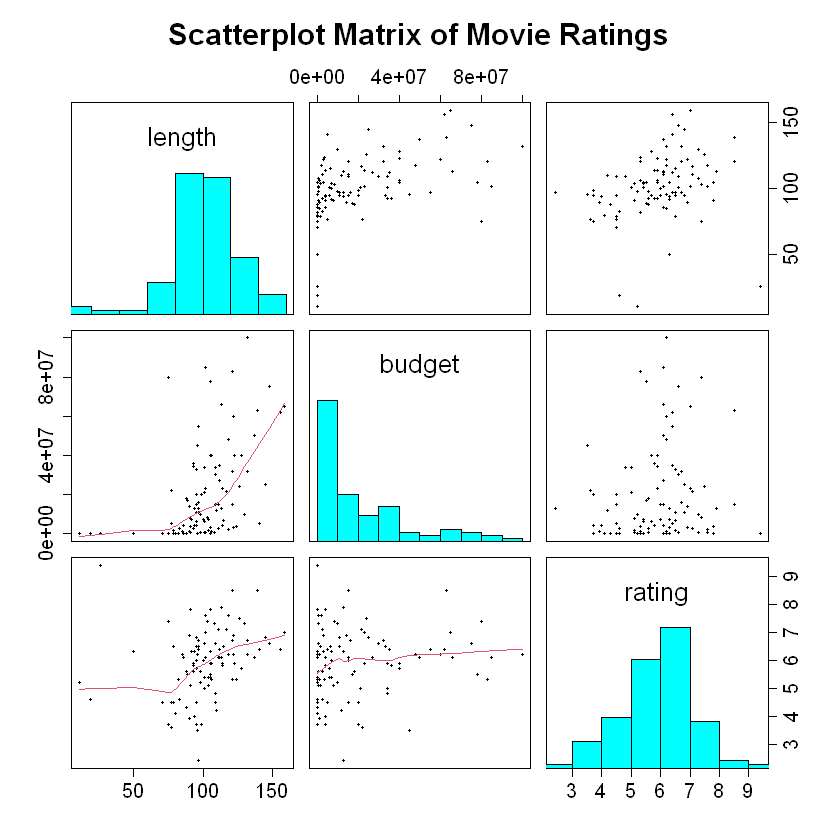

In [7]:
panel.hist <- function(x, ...) {
  usr <- par("usr")
  on.exit(par(usr))
  par(usr = c(usr[1:2], 0, 1.5))
  h <- hist(x, plot = FALSE)
  breaks <- h$breaks
  nB <- length(breaks)
  y <- h$counts
  y <- y / max(y)
  rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
}

# Scatterplot matrix
pairs(
  data[, c(2:4)],
  pch = 19,
  cex = 0.5,
  lower.panel = panel.smooth,
  main = "Scatterplot Matrix of Movie Ratings",
  cex.main = 1.5,
  cex.axis = 1.5,
  cex.lab = 1.5,
  diag.panel = panel.hist,
)


Se puede ver que en length vs budget hay una especie de gráfica logarítmica, mientras que en budget vs length hay una gráfica exponencial.
Luego, en length vs rating solo parece haber una nube de puntos, no hay una línea. Y en rating vs length R si dibuja una línea, pero no es una línea recta.
Finalmente, en budget vs rating hay una nube de puntos que parece una campana de Gauss.

Ahora voy a analizar la correlación entre las variables.

### 1.c)


In [8]:
# Correlation matrix
cor(data[, c(2:4)])


,length,budget,rating
length,1.0000000,0.4540243,0.2673303
budget,0.4540243,1.0000000,0.1357281
rating,0.2673303,0.1357281,1.0000000


Se ve que el par de variables con mayor coeficiente de correlación es budget y length, lo cual tiene sentido porque a mayor longitud de película, mayor tiene que ser el presupuesto. Sin embargo, es una correlación débil, ya que lo contrario no sucede. Puede haber películas con un presupuesto muy alto y una longitud muy baja.
Luego, el par de variables con menor coeficiente de correlación es budget y rating, lo cual también tiene sentido, ya que el presupuesto de la película no tiene por qué estar relacionada con el rating. Lo mismo pasa con la longitud de la película.
